# StarDist 3D Prediction Jupyter Notebook - TiM2023

Modified from: https://github.com/stardist/stardist/tree/master/examples/3D

The Jupyter Notebook show how startdist inference can be applied on 3D images. User need to modify the user settinings to 
specify the input raw data direcory and the model directory (see below)

In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import os
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread
from tifffile import imsave

from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap
from stardist.models import StarDist3D

np.random.seed(6)
lbl_cmap = random_label_cmap()

In [2]:
# Prevent OOM Error by setting the max GPU vRAM avaible for tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    tf.config.LogicalDeviceConfiguration(memory_limit=8048)
    
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

# Load the raw images and the trained model

In [3]:
# Get home user path
def homeDir():
    user_path = os.path.expanduser('~')
    user_path = str(user_path.replace('\\', '/'))
    return user_path

user_path = homeDir()

# User Settings

In [4]:
# User INPUT Settings
dir_raw = os.path.normpath(user_path + "/Downloads/nuceli_3D/validation/*")
file_ext = ".tif"
output_model_path = os.path.normpath(user_path + "/Downloads/nuceli_3D/train/images/model_images_2023-02-11_16T22T30p871653/")
model_name = "stardist"
preview = False

X = sorted(glob(dir_raw + file_ext))
X = list(map(imread,X))
file_name = os.listdir(dir_raw.replace('*', ''))

n_channel = 1 if X[0].ndim == 3 else X[0].shape[-1]
axis_norm = (0,1,2)   # normalize channels independently
#axis_norm = (0,1,2,3) # normalize channels jointly
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))

In [5]:
# Create the output results directory
def create_output_directory(results_dir):
    output_image_path = os.path.join(results_dir,'results_' + str(os.path.basename(os.path.normpath(results_dir))) + '_' + str(datetime.datetime.now()).replace(' ','_').replace('.','p').replace(':','T'))
    if not (os.path.exists(output_image_path)):
        os.mkdir(output_image_path)
    return output_image_path

results_dir = os.path.normpath(dir_raw.replace('*', ''))
output_image_path = create_output_directory(results_dir)
print('Creatining OUTPUT Images directory in the raw images path:', output_image_path)

Creatining OUTPUT Images directory in the raw images path: C:\Users\CarloBeretta\Downloads\nuceli_3D\validation\results_validation_2023-02-12_13T48T17p710372


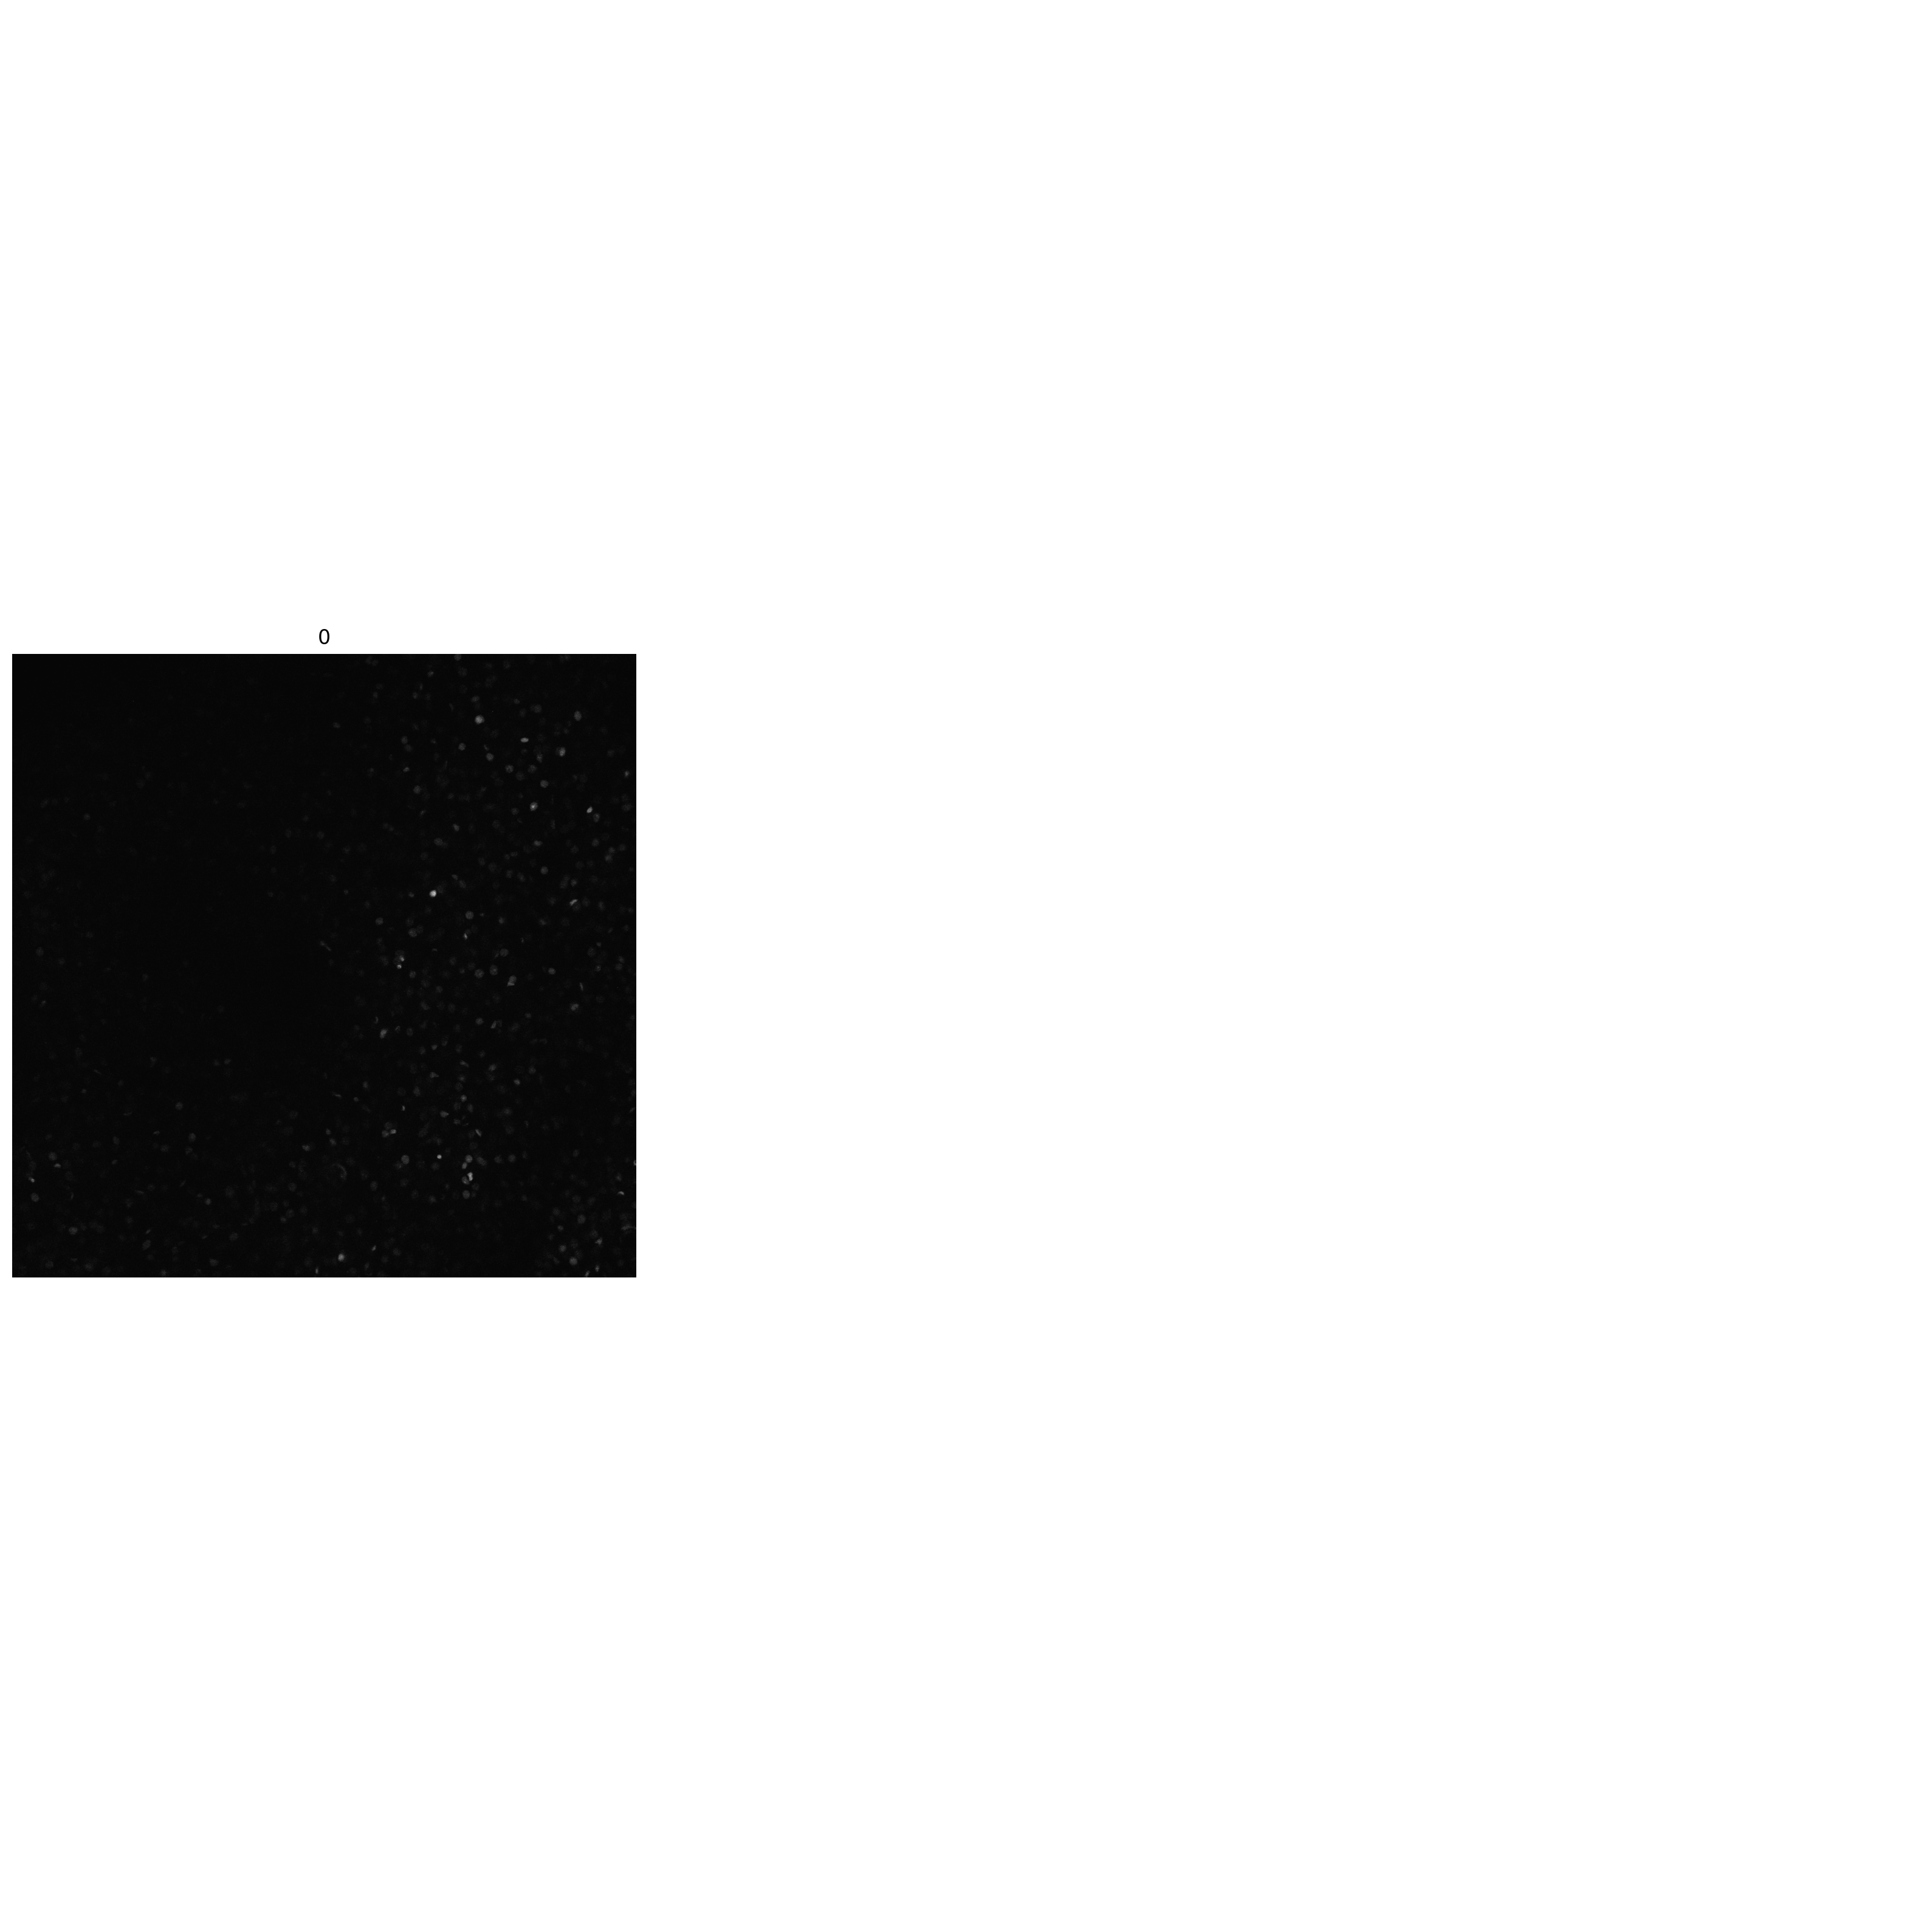

In [6]:
# Show all test images
if True:
    fig, ax = plt.subplots(1,3, figsize=(16,16))
    for i,(a,x) in enumerate(zip(ax.flat, X)):
        a.imshow(x[x.shape[0]//2],cmap='gray')
        a.set_title(i)
    [a.axis('off') for a in ax.flat]
    plt.tight_layout()
None;

# Load trained model

In [7]:
model = StarDist3D(None, name=model_name, basedir=output_model_path)

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.451201, nms_thresh=0.3.


## Prediction

Make sure to normalize the input image beforehand or supply a `normalizer` to the prediction function.

Calling `model.predict_instances` will
- predict object probabilities and star-convex polygon distances (see `model.predict` if you want those)
- perform non-maximum suppression (with overlap threshold `nms_thresh`) for polygons above object probability threshold `prob_thresh`.
- render all remaining polygon instances in a label image
- return the label instances image and also the details (coordinates, etc.) of all remaining polygons

# Save Masks

Processing: C:\Users\CarloBeretta\Downloads\nuceli_3D\validation\results_validation_2023-02-12_13T48T17p710372\220408_M5_DAY0_POS3_960nm_Stack2_higherZ_GREEN.tif
1/1 [==============================] - 0s 25ms/step


  0%|                                                                                                                                   | 0/640 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|▏                                                                                                                          | 1/640 [00:02<23:57,  2.25s/it]

1/1 [==============================] - 0s 34ms/step


  0%|▍                                                                                                                          | 2/640 [00:03<18:42,  1.76s/it]

1/1 [==============================] - 0s 34ms/step


  0%|▌                                                                                                                          | 3/640 [00:05<16:59,  1.60s/it]

1/1 [==============================] - 0s 33ms/step


  1%|▊                                                                                                                          | 4/640 [00:06<16:12,  1.53s/it]

1/1 [==============================] - 0s 33ms/step


  1%|▉                                                                                                                          | 5/640 [00:07<15:45,  1.49s/it]

1/1 [==============================] - 0s 33ms/step


  1%|█▏                                                                                                                         | 6/640 [00:09<15:29,  1.47s/it]

1/1 [==============================] - 0s 33ms/step


  1%|█▎                                                                                                                         | 7/640 [00:10<15:17,  1.45s/it]

1/1 [==============================] - 0s 34ms/step


  1%|█▌                                                                                                                         | 8/640 [00:12<15:18,  1.45s/it]

1/1 [==============================] - 0s 34ms/step


  1%|█▋                                                                                                                         | 9/640 [00:13<15:10,  1.44s/it]

1/1 [==============================] - 0s 34ms/step


  2%|█▉                                                                                                                        | 10/640 [00:15<14:58,  1.43s/it]

1/1 [==============================] - 0s 34ms/step


  2%|██                                                                                                                        | 11/640 [00:16<14:49,  1.41s/it]

1/1 [==============================] - 0s 34ms/step


  2%|██▎                                                                                                                       | 12/640 [00:17<14:42,  1.41s/it]

1/1 [==============================] - 0s 34ms/step


  2%|██▍                                                                                                                       | 13/640 [00:19<14:38,  1.40s/it]

1/1 [==============================] - 0s 34ms/step


  2%|██▋                                                                                                                       | 14/640 [00:20<14:37,  1.40s/it]

1/1 [==============================] - 0s 33ms/step


  2%|██▊                                                                                                                       | 15/640 [00:21<14:36,  1.40s/it]

1/1 [==============================] - 0s 33ms/step


  2%|███                                                                                                                       | 16/640 [00:23<14:38,  1.41s/it]

1/1 [==============================] - 0s 34ms/step


  3%|███▏                                                                                                                      | 17/640 [00:24<14:41,  1.41s/it]

1/1 [==============================] - 0s 33ms/step


  3%|███▍                                                                                                                      | 18/640 [00:26<14:35,  1.41s/it]

1/1 [==============================] - 0s 33ms/step


  3%|███▌                                                                                                                      | 19/640 [00:27<14:29,  1.40s/it]

1/1 [==============================] - 0s 34ms/step


  3%|███▊                                                                                                                      | 20/640 [00:29<14:24,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  3%|████                                                                                                                      | 21/640 [00:30<14:20,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  3%|████▏                                                                                                                     | 22/640 [00:31<14:16,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  4%|████▍                                                                                                                     | 23/640 [00:33<14:14,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  4%|████▌                                                                                                                     | 24/640 [00:34<14:14,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  4%|████▊                                                                                                                     | 25/640 [00:35<14:19,  1.40s/it]

1/1 [==============================] - 0s 33ms/step


  4%|████▉                                                                                                                     | 26/640 [00:37<14:14,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  4%|█████▏                                                                                                                    | 27/640 [00:38<14:09,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  4%|█████▎                                                                                                                    | 28/640 [00:40<14:07,  1.38s/it]

1/1 [==============================] - 0s 33ms/step


  5%|█████▌                                                                                                                    | 29/640 [00:41<14:05,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  5%|█████▋                                                                                                                    | 30/640 [00:42<14:03,  1.38s/it]

1/1 [==============================] - 0s 36ms/step


  5%|█████▉                                                                                                                    | 31/640 [00:44<14:02,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  5%|██████                                                                                                                    | 32/640 [00:45<14:03,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  5%|██████▎                                                                                                                   | 33/640 [00:47<14:05,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  5%|██████▍                                                                                                                   | 34/640 [00:48<14:01,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  5%|██████▋                                                                                                                   | 35/640 [00:49<13:58,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  6%|██████▊                                                                                                                   | 36/640 [00:51<13:56,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  6%|███████                                                                                                                   | 37/640 [00:52<13:54,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  6%|███████▏                                                                                                                  | 38/640 [00:53<13:52,  1.38s/it]

1/1 [==============================] - 0s 33ms/step


  6%|███████▍                                                                                                                  | 39/640 [00:55<13:51,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  6%|███████▋                                                                                                                  | 40/640 [00:56<13:51,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  6%|███████▊                                                                                                                  | 41/640 [00:58<13:53,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  7%|████████                                                                                                                  | 42/640 [00:59<13:52,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  7%|████████▏                                                                                                                 | 43/640 [01:00<13:49,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  7%|████████▍                                                                                                                 | 44/640 [01:02<13:45,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  7%|████████▌                                                                                                                 | 45/640 [01:03<13:43,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  7%|████████▊                                                                                                                 | 46/640 [01:05<13:40,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  7%|████████▉                                                                                                                 | 47/640 [01:06<13:38,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


  8%|█████████▏                                                                                                                | 48/640 [01:07<13:42,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  8%|█████████▎                                                                                                                | 49/640 [01:09<13:45,  1.40s/it]

1/1 [==============================] - 0s 33ms/step


  8%|█████████▌                                                                                                                | 50/640 [01:10<13:41,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  8%|█████████▋                                                                                                                | 51/640 [01:11<13:38,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  8%|█████████▉                                                                                                                | 52/640 [01:13<13:37,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  8%|██████████                                                                                                                | 53/640 [01:14<13:37,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  8%|██████████▎                                                                                                               | 54/640 [01:16<13:35,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


  9%|██████████▍                                                                                                               | 55/640 [01:17<13:34,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


  9%|██████████▋                                                                                                               | 56/640 [01:18<13:35,  1.40s/it]

1/1 [==============================] - 0s 34ms/step


  9%|██████████▊                                                                                                               | 57/640 [01:20<13:41,  1.41s/it]

1/1 [==============================] - 0s 33ms/step


  9%|███████████                                                                                                               | 58/640 [01:21<13:40,  1.41s/it]

1/1 [==============================] - 0s 33ms/step


  9%|███████████▏                                                                                                              | 59/640 [01:23<13:40,  1.41s/it]

1/1 [==============================] - 0s 34ms/step


  9%|███████████▍                                                                                                              | 60/640 [01:24<13:37,  1.41s/it]

1/1 [==============================] - 0s 33ms/step


 10%|███████████▋                                                                                                              | 61/640 [01:26<13:34,  1.41s/it]

1/1 [==============================] - 0s 33ms/step


 10%|███████████▊                                                                                                              | 62/640 [01:27<13:32,  1.41s/it]

1/1 [==============================] - 0s 33ms/step


 10%|████████████                                                                                                              | 63/640 [01:28<13:30,  1.40s/it]

1/1 [==============================] - 0s 34ms/step


 10%|████████████▏                                                                                                             | 64/640 [01:30<13:31,  1.41s/it]

1/1 [==============================] - 0s 33ms/step


 10%|████████████▍                                                                                                             | 65/640 [01:31<13:11,  1.38s/it]

1/1 [==============================] - 0s 33ms/step


 10%|████████████▌                                                                                                             | 66/640 [01:32<12:50,  1.34s/it]

1/1 [==============================] - 0s 34ms/step


 10%|████████████▊                                                                                                             | 67/640 [01:34<12:36,  1.32s/it]

1/1 [==============================] - 0s 34ms/step


 11%|████████████▉                                                                                                             | 68/640 [01:35<12:25,  1.30s/it]

1/1 [==============================] - 0s 34ms/step


 11%|█████████████▏                                                                                                            | 69/640 [01:36<12:18,  1.29s/it]

1/1 [==============================] - 0s 33ms/step


 11%|█████████████▎                                                                                                            | 70/640 [01:37<12:14,  1.29s/it]

1/1 [==============================] - 0s 33ms/step


 11%|█████████████▌                                                                                                            | 71/640 [01:39<12:09,  1.28s/it]

1/1 [==============================] - 0s 33ms/step


 11%|█████████████▋                                                                                                            | 72/640 [01:40<12:06,  1.28s/it]

1/1 [==============================] - 0s 35ms/step


 11%|█████████████▉                                                                                                            | 73/640 [01:41<12:03,  1.28s/it]

1/1 [==============================] - 0s 34ms/step


 12%|██████████████                                                                                                            | 74/640 [01:42<11:58,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 12%|██████████████▎                                                                                                           | 75/640 [01:44<11:55,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 12%|██████████████▍                                                                                                           | 76/640 [01:45<11:52,  1.26s/it]

1/1 [==============================] - 0s 35ms/step


 12%|██████████████▋                                                                                                           | 77/640 [01:46<11:49,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 12%|██████████████▊                                                                                                           | 78/640 [01:48<11:49,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 12%|███████████████                                                                                                           | 79/640 [01:49<11:48,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 12%|███████████████▎                                                                                                          | 80/640 [01:50<11:47,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 13%|███████████████▍                                                                                                          | 81/640 [01:51<11:49,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 13%|███████████████▋                                                                                                          | 82/640 [01:53<11:45,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 13%|███████████████▊                                                                                                          | 83/640 [01:54<11:42,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 13%|████████████████                                                                                                          | 84/640 [01:55<11:40,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 13%|████████████████▏                                                                                                         | 85/640 [01:56<11:39,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 13%|████████████████▍                                                                                                         | 86/640 [01:58<11:38,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 14%|████████████████▌                                                                                                         | 87/640 [01:59<11:38,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 14%|████████████████▊                                                                                                         | 88/640 [02:00<11:38,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 14%|████████████████▉                                                                                                         | 89/640 [02:01<11:38,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 14%|█████████████████▏                                                                                                        | 90/640 [02:03<11:34,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 14%|█████████████████▎                                                                                                        | 91/640 [02:04<11:31,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 14%|█████████████████▌                                                                                                        | 92/640 [02:05<11:31,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 15%|█████████████████▋                                                                                                        | 93/640 [02:06<11:29,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 15%|█████████████████▉                                                                                                        | 94/640 [02:08<11:29,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 15%|██████████████████                                                                                                        | 95/640 [02:09<11:26,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 15%|██████████████████▎                                                                                                       | 96/640 [02:10<11:26,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 15%|██████████████████▍                                                                                                       | 97/640 [02:12<11:27,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 15%|██████████████████▋                                                                                                       | 98/640 [02:13<11:26,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 15%|██████████████████▊                                                                                                       | 99/640 [02:14<11:23,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 16%|██████████████████▉                                                                                                      | 100/640 [02:15<11:21,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 16%|███████████████████                                                                                                      | 101/640 [02:17<11:19,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 16%|███████████████████▎                                                                                                     | 102/640 [02:18<11:17,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 16%|███████████████████▍                                                                                                     | 103/640 [02:19<11:15,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 16%|███████████████████▋                                                                                                     | 104/640 [02:20<11:15,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 16%|███████████████████▊                                                                                                     | 105/640 [02:22<11:16,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 17%|████████████████████                                                                                                     | 106/640 [02:23<11:14,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 17%|████████████████████▏                                                                                                    | 107/640 [02:24<11:12,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 17%|████████████████████▍                                                                                                    | 108/640 [02:25<11:10,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 17%|████████████████████▌                                                                                                    | 109/640 [02:27<11:09,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 17%|████████████████████▊                                                                                                    | 110/640 [02:28<11:07,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 17%|████████████████████▉                                                                                                    | 111/640 [02:29<11:07,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 18%|█████████████████████▏                                                                                                   | 112/640 [02:30<11:06,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 18%|█████████████████████▎                                                                                                   | 113/640 [02:32<11:06,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 18%|█████████████████████▌                                                                                                   | 114/640 [02:33<11:05,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 18%|█████████████████████▋                                                                                                   | 115/640 [02:34<11:05,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 18%|█████████████████████▉                                                                                                   | 116/640 [02:35<11:03,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 18%|██████████████████████                                                                                                   | 117/640 [02:37<11:01,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 18%|██████████████████████▎                                                                                                  | 118/640 [02:38<10:58,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 19%|██████████████████████▍                                                                                                  | 119/640 [02:39<10:56,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 19%|██████████████████████▋                                                                                                  | 120/640 [02:41<10:54,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 19%|██████████████████████▉                                                                                                  | 121/640 [02:42<10:57,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 19%|███████████████████████                                                                                                  | 122/640 [02:43<10:54,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 19%|███████████████████████▎                                                                                                 | 123/640 [02:44<10:54,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 19%|███████████████████████▍                                                                                                 | 124/640 [02:46<10:53,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 20%|███████████████████████▋                                                                                                 | 125/640 [02:47<10:52,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 20%|███████████████████████▊                                                                                                 | 126/640 [02:48<10:52,  1.27s/it]

1/1 [==============================] - 0s 36ms/step


 20%|████████████████████████                                                                                                 | 127/640 [02:49<10:50,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 20%|████████████████████████▏                                                                                                | 128/640 [02:51<10:49,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 20%|████████████████████████▍                                                                                                | 129/640 [02:52<10:49,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 20%|████████████████████████▌                                                                                                | 130/640 [02:53<10:46,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 20%|████████████████████████▊                                                                                                | 131/640 [02:54<10:45,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 21%|████████████████████████▉                                                                                                | 132/640 [02:56<10:43,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 21%|█████████████████████████▏                                                                                               | 133/640 [02:57<10:43,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 21%|█████████████████████████▎                                                                                               | 134/640 [02:58<10:41,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 21%|█████████████████████████▌                                                                                               | 135/640 [03:00<10:40,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 21%|█████████████████████████▋                                                                                               | 136/640 [03:01<10:39,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 21%|█████████████████████████▉                                                                                               | 137/640 [03:02<10:40,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 22%|██████████████████████████                                                                                               | 138/640 [03:03<10:36,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 22%|██████████████████████████▎                                                                                              | 139/640 [03:05<10:32,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 22%|██████████████████████████▍                                                                                              | 140/640 [03:06<10:30,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 22%|██████████████████████████▋                                                                                              | 141/640 [03:07<10:28,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 22%|██████████████████████████▊                                                                                              | 142/640 [03:08<10:27,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 22%|███████████████████████████                                                                                              | 143/640 [03:10<10:26,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 22%|███████████████████████████▏                                                                                             | 144/640 [03:11<10:26,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 23%|███████████████████████████▍                                                                                             | 145/640 [03:12<10:26,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 23%|███████████████████████████▌                                                                                             | 146/640 [03:13<10:23,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 23%|███████████████████████████▊                                                                                             | 147/640 [03:15<10:20,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 23%|███████████████████████████▉                                                                                             | 148/640 [03:16<10:19,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 23%|████████████████████████████▏                                                                                            | 149/640 [03:17<10:17,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 23%|████████████████████████████▎                                                                                            | 150/640 [03:18<10:16,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 24%|████████████████████████████▌                                                                                            | 151/640 [03:20<10:15,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 24%|████████████████████████████▋                                                                                            | 152/640 [03:21<10:15,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 24%|████████████████████████████▉                                                                                            | 153/640 [03:22<10:16,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 24%|█████████████████████████████                                                                                            | 154/640 [03:24<10:14,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 24%|█████████████████████████████▎                                                                                           | 155/640 [03:25<10:11,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 24%|█████████████████████████████▍                                                                                           | 156/640 [03:26<10:09,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 25%|█████████████████████████████▋                                                                                           | 157/640 [03:27<10:08,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 25%|█████████████████████████████▊                                                                                           | 158/640 [03:29<10:06,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 25%|██████████████████████████████                                                                                           | 159/640 [03:30<10:05,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 25%|██████████████████████████████▎                                                                                          | 160/640 [03:31<10:06,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 25%|██████████████████████████████▍                                                                                          | 161/640 [03:32<10:06,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 25%|██████████████████████████████▋                                                                                          | 162/640 [03:34<10:03,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 25%|██████████████████████████████▊                                                                                          | 163/640 [03:35<10:01,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 26%|███████████████████████████████                                                                                          | 164/640 [03:36<09:59,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 26%|███████████████████████████████▏                                                                                         | 165/640 [03:37<09:59,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 26%|███████████████████████████████▍                                                                                         | 166/640 [03:39<09:57,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 26%|███████████████████████████████▌                                                                                         | 167/640 [03:40<09:56,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 26%|███████████████████████████████▊                                                                                         | 168/640 [03:41<09:56,  1.26s/it]

1/1 [==============================] - 0s 35ms/step


 26%|███████████████████████████████▉                                                                                         | 169/640 [03:42<09:55,  1.26s/it]

1/1 [==============================] - 0s 35ms/step


 27%|████████████████████████████████▏                                                                                        | 170/640 [03:44<09:52,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 27%|████████████████████████████████▎                                                                                        | 171/640 [03:45<09:51,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 27%|████████████████████████████████▌                                                                                        | 172/640 [03:46<09:49,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 27%|████████████████████████████████▋                                                                                        | 173/640 [03:47<09:47,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 27%|████████████████████████████████▉                                                                                        | 174/640 [03:49<09:46,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 27%|█████████████████████████████████                                                                                        | 175/640 [03:50<09:45,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 28%|█████████████████████████████████▎                                                                                       | 176/640 [03:51<09:45,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 28%|█████████████████████████████████▍                                                                                       | 177/640 [03:53<09:45,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 28%|█████████████████████████████████▋                                                                                       | 178/640 [03:54<09:43,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 28%|█████████████████████████████████▊                                                                                       | 179/640 [03:55<09:41,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 28%|██████████████████████████████████                                                                                       | 180/640 [03:56<09:39,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 28%|██████████████████████████████████▏                                                                                      | 181/640 [03:58<09:38,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 28%|██████████████████████████████████▍                                                                                      | 182/640 [03:59<09:38,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 29%|██████████████████████████████████▌                                                                                      | 183/640 [04:00<09:36,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 29%|██████████████████████████████████▊                                                                                      | 184/640 [04:01<09:35,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 29%|██████████████████████████████████▉                                                                                      | 185/640 [04:03<09:35,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 29%|███████████████████████████████████▏                                                                                     | 186/640 [04:04<09:34,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 29%|███████████████████████████████████▎                                                                                     | 187/640 [04:05<09:33,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 29%|███████████████████████████████████▌                                                                                     | 188/640 [04:06<09:33,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 30%|███████████████████████████████████▋                                                                                     | 189/640 [04:08<09:32,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 30%|███████████████████████████████████▉                                                                                     | 190/640 [04:09<09:30,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 30%|████████████████████████████████████                                                                                     | 191/640 [04:10<09:28,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 30%|████████████████████████████████████▎                                                                                    | 192/640 [04:12<09:27,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 30%|████████████████████████████████████▍                                                                                    | 193/640 [04:13<09:28,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 30%|████████████████████████████████████▋                                                                                    | 194/640 [04:14<09:25,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 30%|████████████████████████████████████▊                                                                                    | 195/640 [04:15<09:23,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 31%|█████████████████████████████████████                                                                                    | 196/640 [04:17<09:21,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 31%|█████████████████████████████████████▏                                                                                   | 197/640 [04:18<09:19,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 31%|█████████████████████████████████████▍                                                                                   | 198/640 [04:19<09:19,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 31%|█████████████████████████████████████▌                                                                                   | 199/640 [04:20<09:20,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 31%|█████████████████████████████████████▊                                                                                   | 200/640 [04:22<09:19,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 31%|██████████████████████████████████████                                                                                   | 201/640 [04:23<09:17,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 32%|██████████████████████████████████████▏                                                                                  | 202/640 [04:24<09:15,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 32%|██████████████████████████████████████▍                                                                                  | 203/640 [04:25<09:12,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 32%|██████████████████████████████████████▌                                                                                  | 204/640 [04:27<09:10,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 32%|██████████████████████████████████████▊                                                                                  | 205/640 [04:28<09:07,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 32%|██████████████████████████████████████▉                                                                                  | 206/640 [04:29<09:06,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 32%|███████████████████████████████████████▏                                                                                 | 207/640 [04:30<09:04,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 32%|███████████████████████████████████████▎                                                                                 | 208/640 [04:32<09:03,  1.26s/it]

1/1 [==============================] - 0s 35ms/step


 33%|███████████████████████████████████████▌                                                                                 | 209/640 [04:33<09:03,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 33%|███████████████████████████████████████▋                                                                                 | 210/640 [04:34<09:03,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 33%|███████████████████████████████████████▉                                                                                 | 211/640 [04:36<09:00,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 33%|████████████████████████████████████████                                                                                 | 212/640 [04:37<08:58,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 33%|████████████████████████████████████████▎                                                                                | 213/640 [04:38<08:56,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 33%|████████████████████████████████████████▍                                                                                | 214/640 [04:39<08:55,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 34%|████████████████████████████████████████▋                                                                                | 215/640 [04:41<08:54,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 34%|████████████████████████████████████████▊                                                                                | 216/640 [04:42<08:55,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████████████████████████████████                                                                                | 217/640 [04:43<08:55,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████████████████████████████████▏                                                                               | 218/640 [04:44<08:53,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████████████████████████████████▍                                                                               | 219/640 [04:46<08:50,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████████████████████████████████▌                                                                               | 220/640 [04:47<08:48,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████████████████████████████████▊                                                                               | 221/640 [04:48<08:48,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████████████████████████████████▉                                                                               | 222/640 [04:49<08:46,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 35%|██████████████████████████████████████████▏                                                                              | 223/640 [04:51<08:45,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 35%|██████████████████████████████████████████▎                                                                              | 224/640 [04:52<08:44,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 35%|██████████████████████████████████████████▌                                                                              | 225/640 [04:53<08:45,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 35%|██████████████████████████████████████████▋                                                                              | 226/640 [04:54<08:42,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 35%|██████████████████████████████████████████▉                                                                              | 227/640 [04:56<08:41,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 36%|███████████████████████████████████████████                                                                              | 228/640 [04:57<08:38,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 36%|███████████████████████████████████████████▎                                                                             | 229/640 [04:58<08:37,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 36%|███████████████████████████████████████████▍                                                                             | 230/640 [04:59<08:36,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 36%|███████████████████████████████████████████▋                                                                             | 231/640 [05:01<08:35,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 36%|███████████████████████████████████████████▊                                                                             | 232/640 [05:02<08:34,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 36%|████████████████████████████████████████████                                                                             | 233/640 [05:03<08:36,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 37%|████████████████████████████████████████████▏                                                                            | 234/640 [05:05<08:33,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 37%|████████████████████████████████████████████▍                                                                            | 235/640 [05:06<08:31,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 37%|████████████████████████████████████████████▌                                                                            | 236/640 [05:07<08:29,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 37%|████████████████████████████████████████████▊                                                                            | 237/640 [05:08<08:26,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 37%|████████████████████████████████████████████▉                                                                            | 238/640 [05:10<08:26,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 37%|█████████████████████████████████████████████▏                                                                           | 239/640 [05:11<08:24,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 38%|█████████████████████████████████████████████▍                                                                           | 240/640 [05:12<08:23,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 38%|█████████████████████████████████████████████▌                                                                           | 241/640 [05:13<08:23,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 38%|█████████████████████████████████████████████▊                                                                           | 242/640 [05:15<08:21,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 38%|█████████████████████████████████████████████▉                                                                           | 243/640 [05:16<08:20,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████████████████████████████████████▏                                                                          | 244/640 [05:17<08:20,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████████████████████████████████████▎                                                                          | 245/640 [05:19<09:17,  1.41s/it]

1/1 [==============================] - 0s 55ms/step


 38%|██████████████████████████████████████████████▌                                                                          | 246/640 [05:21<10:02,  1.53s/it]

1/1 [==============================] - 0s 32ms/step


 39%|██████████████████████████████████████████████▋                                                                          | 247/640 [05:22<09:23,  1.43s/it]

1/1 [==============================] - 0s 33ms/step


 39%|██████████████████████████████████████████████▉                                                                          | 248/640 [05:23<08:46,  1.34s/it]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████████████████████████████████████                                                                          | 249/640 [05:24<08:24,  1.29s/it]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████████████████████████████████████▎                                                                         | 250/640 [05:25<08:10,  1.26s/it]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████████████████████████████████████▍                                                                         | 251/640 [05:27<07:57,  1.23s/it]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████████████████████████████████████▋                                                                         | 252/640 [05:28<07:46,  1.20s/it]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████████████████████████████████████▊                                                                         | 253/640 [05:29<07:37,  1.18s/it]

1/1 [==============================] - 0s 32ms/step


 40%|████████████████████████████████████████████████                                                                         | 254/640 [05:30<07:30,  1.17s/it]

1/1 [==============================] - 0s 32ms/step


 40%|████████████████████████████████████████████████▏                                                                        | 255/640 [05:31<07:27,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 40%|████████████████████████████████████████████████▍                                                                        | 256/640 [05:32<07:22,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 40%|████████████████████████████████████████████████▌                                                                        | 257/640 [05:33<07:26,  1.17s/it]

1/1 [==============================] - 0s 32ms/step


 40%|████████████████████████████████████████████████▊                                                                        | 258/640 [05:35<07:23,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 40%|████████████████████████████████████████████████▉                                                                        | 259/640 [05:36<07:19,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 41%|█████████████████████████████████████████████████▏                                                                       | 260/640 [05:37<07:15,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 41%|█████████████████████████████████████████████████▎                                                                       | 261/640 [05:38<07:12,  1.14s/it]

1/1 [==============================] - 0s 34ms/step


 41%|█████████████████████████████████████████████████▌                                                                       | 262/640 [05:39<07:11,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 41%|█████████████████████████████████████████████████▋                                                                       | 263/640 [05:40<07:09,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 41%|█████████████████████████████████████████████████▉                                                                       | 264/640 [05:41<07:15,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 41%|██████████████████████████████████████████████████                                                                       | 265/640 [05:43<07:14,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 42%|██████████████████████████████████████████████████▎                                                                      | 266/640 [05:44<07:12,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 42%|██████████████████████████████████████████████████▍                                                                      | 267/640 [05:45<07:07,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 42%|██████████████████████████████████████████████████▋                                                                      | 268/640 [05:46<07:03,  1.14s/it]

1/1 [==============================] - 0s 40ms/step


 42%|██████████████████████████████████████████████████▊                                                                      | 269/640 [05:47<07:02,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 42%|███████████████████████████████████████████████████                                                                      | 270/640 [05:48<06:59,  1.13s/it]

1/1 [==============================] - 0s 32ms/step


 42%|███████████████████████████████████████████████████▏                                                                     | 271/640 [05:49<07:02,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 42%|███████████████████████████████████████████████████▍                                                                     | 272/640 [05:51<07:03,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 43%|███████████████████████████████████████████████████▌                                                                     | 273/640 [05:52<07:01,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 43%|███████████████████████████████████████████████████▊                                                                     | 274/640 [05:53<06:56,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 43%|███████████████████████████████████████████████████▉                                                                     | 275/640 [05:54<06:53,  1.13s/it]

1/1 [==============================] - 0s 39ms/step


 43%|████████████████████████████████████████████████████▏                                                                    | 276/640 [05:55<06:52,  1.13s/it]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████████████████████████████████████████▎                                                                    | 277/640 [05:56<06:50,  1.13s/it]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████████████████████████████████████████▌                                                                    | 278/640 [05:57<06:54,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 44%|████████████████████████████████████████████████████▋                                                                    | 279/640 [05:59<06:53,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 44%|████████████████████████████████████████████████████▉                                                                    | 280/640 [06:00<06:52,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████████████████████████████████████████▏                                                                   | 281/640 [06:01<06:49,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████████████████████████████████████████▎                                                                   | 282/640 [06:02<06:46,  1.13s/it]

1/1 [==============================] - 0s 39ms/step


 44%|█████████████████████████████████████████████████████▌                                                                   | 283/640 [06:03<06:46,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████████████████████████████████████████▋                                                                   | 284/640 [06:04<06:43,  1.13s/it]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████████████████████████████████████████▉                                                                   | 285/640 [06:05<06:47,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 45%|██████████████████████████████████████████████████████                                                                   | 286/640 [06:07<06:47,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 45%|██████████████████████████████████████████████████████▎                                                                  | 287/640 [06:08<06:44,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 45%|██████████████████████████████████████████████████████▍                                                                  | 288/640 [06:09<06:41,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 45%|██████████████████████████████████████████████████████▋                                                                  | 289/640 [06:10<06:40,  1.14s/it]

1/1 [==============================] - 0s 36ms/step


 45%|██████████████████████████████████████████████████████▊                                                                  | 290/640 [06:11<06:38,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 45%|███████████████████████████████████████████████████████                                                                  | 291/640 [06:12<06:34,  1.13s/it]

1/1 [==============================] - 0s 32ms/step


 46%|███████████████████████████████████████████████████████▏                                                                 | 292/640 [06:13<06:38,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 46%|███████████████████████████████████████████████████████▍                                                                 | 293/640 [06:15<06:38,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 46%|███████████████████████████████████████████████████████▌                                                                 | 294/640 [06:16<06:38,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 46%|███████████████████████████████████████████████████████▊                                                                 | 295/640 [06:17<06:33,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 46%|███████████████████████████████████████████████████████▉                                                                 | 296/640 [06:18<06:30,  1.14s/it]

1/1 [==============================] - 0s 33ms/step


 46%|████████████████████████████████████████████████████████▏                                                                | 297/640 [06:19<06:29,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 47%|████████████████████████████████████████████████████████▎                                                                | 298/640 [06:20<06:27,  1.13s/it]

1/1 [==============================] - 0s 31ms/step


 47%|████████████████████████████████████████████████████████▌                                                                | 299/640 [06:21<06:31,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 47%|████████████████████████████████████████████████████████▋                                                                | 300/640 [06:23<06:33,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 47%|████████████████████████████████████████████████████████▉                                                                | 301/640 [06:24<06:29,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 47%|█████████████████████████████████████████████████████████                                                                | 302/640 [06:25<06:25,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 47%|█████████████████████████████████████████████████████████▎                                                               | 303/640 [06:26<06:22,  1.13s/it]

1/1 [==============================] - 0s 32ms/step


 48%|█████████████████████████████████████████████████████████▍                                                               | 304/640 [06:27<06:21,  1.13s/it]

1/1 [==============================] - 0s 31ms/step


 48%|█████████████████████████████████████████████████████████▋                                                               | 305/640 [06:28<06:20,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 48%|█████████████████████████████████████████████████████████▊                                                               | 306/640 [06:29<06:24,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████████████████████████████████████████████                                                               | 307/640 [06:31<06:23,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████████████████████████████████████████████▏                                                              | 308/640 [06:32<06:20,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████████████████████████████████████████████▍                                                              | 309/640 [06:33<06:17,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████████████████████████████████████████████▌                                                              | 310/640 [06:34<06:14,  1.13s/it]

1/1 [==============================] - 0s 32ms/step


 49%|██████████████████████████████████████████████████████████▊                                                              | 311/640 [06:35<06:16,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 49%|██████████████████████████████████████████████████████████▉                                                              | 312/640 [06:36<06:12,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 49%|███████████████████████████████████████████████████████████▏                                                             | 313/640 [06:37<06:18,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████████████████████████████████████████████▎                                                             | 314/640 [06:39<06:18,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████████████████████████████████████████████▌                                                             | 315/640 [06:40<06:16,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████████████████████████████████████████████▋                                                             | 316/640 [06:41<06:12,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 50%|███████████████████████████████████████████████████████████▉                                                             | 317/640 [06:42<06:09,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 50%|████████████████████████████████████████████████████████████                                                             | 318/640 [06:43<06:08,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 50%|████████████████████████████████████████████████████████████▎                                                            | 319/640 [06:44<06:11,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 50%|████████████████████████████████████████████████████████████▌                                                            | 320/640 [06:46<06:13,  1.17s/it]

1/1 [==============================] - 0s 32ms/step


 50%|████████████████████████████████████████████████████████████▋                                                            | 321/640 [06:47<06:12,  1.17s/it]

1/1 [==============================] - 0s 32ms/step


 50%|████████████████████████████████████████████████████████████▉                                                            | 322/640 [06:48<06:07,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 50%|█████████████████████████████████████████████████████████████                                                            | 323/640 [06:49<06:03,  1.15s/it]

1/1 [==============================] - 0s 38ms/step


 51%|█████████████████████████████████████████████████████████████▎                                                           | 324/640 [06:50<06:02,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 51%|█████████████████████████████████████████████████████████████▍                                                           | 325/640 [06:51<05:59,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 51%|█████████████████████████████████████████████████████████████▋                                                           | 326/640 [06:52<06:03,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 51%|█████████████████████████████████████████████████████████████▊                                                           | 327/640 [06:54<06:04,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 51%|██████████████████████████████████████████████████████████████                                                           | 328/640 [06:55<06:03,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 51%|██████████████████████████████████████████████████████████████▏                                                          | 329/640 [06:56<05:58,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 52%|██████████████████████████████████████████████████████████████▍                                                          | 330/640 [06:57<05:54,  1.14s/it]

1/1 [==============================] - 0s 33ms/step


 52%|██████████████████████████████████████████████████████████████▌                                                          | 331/640 [06:58<05:52,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 52%|██████████████████████████████████████████████████████████████▊                                                          | 332/640 [06:59<05:53,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 52%|██████████████████████████████████████████████████████████████▉                                                          | 333/640 [07:01<05:56,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 52%|███████████████████████████████████████████████████████████████▏                                                         | 334/640 [07:02<05:54,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 52%|███████████████████████████████████████████████████████████████▎                                                         | 335/640 [07:03<05:51,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 52%|███████████████████████████████████████████████████████████████▌                                                         | 336/640 [07:04<05:47,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 53%|███████████████████████████████████████████████████████████████▋                                                         | 337/640 [07:05<05:45,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 53%|███████████████████████████████████████████████████████████████▉                                                         | 338/640 [07:06<05:43,  1.14s/it]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████████████████████████████████████████████████                                                         | 339/640 [07:07<05:49,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████████████████████████████████████████████████▎                                                        | 340/640 [07:09<05:48,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████████████████████████████████████████████████▍                                                        | 341/640 [07:10<05:46,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████████████████████████████████████████████████▋                                                        | 342/640 [07:11<05:41,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 54%|████████████████████████████████████████████████████████████████▊                                                        | 343/640 [07:12<05:38,  1.14s/it]

1/1 [==============================] - 0s 37ms/step


 54%|█████████████████████████████████████████████████████████████████                                                        | 344/640 [07:13<05:38,  1.14s/it]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████████████████████████████████████████████████▏                                                       | 345/640 [07:14<05:37,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████████████████████████████████████████████████▍                                                       | 346/640 [07:15<05:40,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████████████████████████████████████████████████▌                                                       | 347/640 [07:17<05:39,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████████████████████████████████████████████████▊                                                       | 348/640 [07:18<05:37,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████████████████████████████████████████████████▉                                                       | 349/640 [07:19<05:33,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 55%|██████████████████████████████████████████████████████████████████▏                                                      | 350/640 [07:20<05:31,  1.14s/it]

1/1 [==============================] - 0s 33ms/step


 55%|██████████████████████████████████████████████████████████████████▎                                                      | 351/640 [07:21<05:30,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 55%|██████████████████████████████████████████████████████████████████▌                                                      | 352/640 [07:22<05:33,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 55%|██████████████████████████████████████████████████████████████████▋                                                      | 353/640 [07:24<05:35,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 55%|██████████████████████████████████████████████████████████████████▉                                                      | 354/640 [07:25<05:33,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 55%|███████████████████████████████████████████████████████████████████                                                      | 355/640 [07:26<05:28,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 56%|███████████████████████████████████████████████████████████████████▎                                                     | 356/640 [07:27<05:25,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 56%|███████████████████████████████████████████████████████████████████▍                                                     | 357/640 [07:28<05:23,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 56%|███████████████████████████████████████████████████████████████████▋                                                     | 358/640 [07:29<05:20,  1.14s/it]

1/1 [==============================] - 0s 34ms/step


 56%|███████████████████████████████████████████████████████████████████▊                                                     | 359/640 [07:30<05:25,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 56%|████████████████████████████████████████████████████████████████████                                                     | 360/640 [07:32<05:26,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 56%|████████████████████████████████████████████████████████████████████▎                                                    | 361/640 [07:33<05:24,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 57%|████████████████████████████████████████████████████████████████████▍                                                    | 362/640 [07:34<05:20,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 57%|████████████████████████████████████████████████████████████████████▋                                                    | 363/640 [07:35<05:17,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 57%|████████████████████████████████████████████████████████████████████▊                                                    | 364/640 [07:36<05:16,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 57%|█████████████████████████████████████████████████████████████████████                                                    | 365/640 [07:37<05:15,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 57%|█████████████████████████████████████████████████████████████████████▏                                                   | 366/640 [07:39<05:18,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 57%|█████████████████████████████████████████████████████████████████████▍                                                   | 367/640 [07:40<05:17,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 57%|█████████████████████████████████████████████████████████████████████▌                                                   | 368/640 [07:41<05:13,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 58%|█████████████████████████████████████████████████████████████████████▊                                                   | 369/640 [07:42<05:12,  1.15s/it]

1/1 [==============================] - 0s 37ms/step


 58%|█████████████████████████████████████████████████████████████████████▉                                                   | 370/640 [07:43<05:10,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 58%|██████████████████████████████████████████████████████████████████████▏                                                  | 371/640 [07:44<05:07,  1.14s/it]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████████████████████████████████████████████████████▎                                                  | 372/640 [07:45<05:11,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████████████████████████████████████████████████████▌                                                  | 373/640 [07:47<05:11,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████████████████████████████████████████████████████▋                                                  | 374/640 [07:48<05:09,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 59%|██████████████████████████████████████████████████████████████████████▉                                                  | 375/640 [07:49<05:05,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████████████████████████████████████████████████████                                                  | 376/640 [07:50<05:03,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████████████████████████████████████████████████████▎                                                 | 377/640 [07:51<05:03,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████████████████████████████████████████████████████▍                                                 | 378/640 [07:52<05:08,  1.18s/it]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████████████████████████████████████████████████████▋                                                 | 379/640 [07:54<05:07,  1.18s/it]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████████████████████████████████████████████████████▊                                                 | 380/640 [07:55<05:04,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 60%|████████████████████████████████████████████████████████████████████████                                                 | 381/640 [07:56<05:00,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 60%|████████████████████████████████████████████████████████████████████████▏                                                | 382/640 [07:57<04:57,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 60%|████████████████████████████████████████████████████████████████████████▍                                                | 383/640 [07:58<04:56,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 60%|████████████████████████████████████████████████████████████████████████▌                                                | 384/640 [07:59<05:01,  1.18s/it]

1/1 [==============================] - 0s 34ms/step


 60%|████████████████████████████████████████████████████████████████████████▊                                                | 385/640 [08:01<05:02,  1.19s/it]

1/1 [==============================] - 0s 34ms/step


 60%|████████████████████████████████████████████████████████████████████████▉                                                | 386/640 [08:02<04:59,  1.18s/it]

1/1 [==============================] - 0s 34ms/step


 60%|█████████████████████████████████████████████████████████████████████████▏                                               | 387/640 [08:03<04:55,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 61%|█████████████████████████████████████████████████████████████████████████▎                                               | 388/640 [08:04<04:52,  1.16s/it]

1/1 [==============================] - 0s 31ms/step


 61%|█████████████████████████████████████████████████████████████████████████▌                                               | 389/640 [08:05<04:50,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 61%|█████████████████████████████████████████████████████████████████████████▋                                               | 390/640 [08:06<04:53,  1.18s/it]

1/1 [==============================] - 0s 34ms/step


 61%|█████████████████████████████████████████████████████████████████████████▉                                               | 391/640 [08:08<04:53,  1.18s/it]

1/1 [==============================] - 0s 34ms/step


 61%|██████████████████████████████████████████████████████████████████████████                                               | 392/640 [08:09<04:51,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 61%|██████████████████████████████████████████████████████████████████████████▎                                              | 393/640 [08:10<04:47,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 62%|██████████████████████████████████████████████████████████████████████████▍                                              | 394/640 [08:11<04:44,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 62%|██████████████████████████████████████████████████████████████████████████▋                                              | 395/640 [08:12<04:42,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 62%|██████████████████████████████████████████████████████████████████████████▊                                              | 396/640 [08:13<04:45,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 62%|███████████████████████████████████████████████████████████████████████████                                              | 397/640 [08:15<04:44,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 62%|███████████████████████████████████████████████████████████████████████████▏                                             | 398/640 [08:16<04:42,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 62%|███████████████████████████████████████████████████████████████████████████▍                                             | 399/640 [08:17<04:38,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 62%|███████████████████████████████████████████████████████████████████████████▋                                             | 400/640 [08:18<04:35,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 63%|███████████████████████████████████████████████████████████████████████████▊                                             | 401/640 [08:19<04:35,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████████████████████████████████████████████████████████                                             | 402/640 [08:20<04:36,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████████████████████████████████████████████████████████▏                                            | 403/640 [08:22<04:37,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████████████████████████████████████████████████████████▍                                            | 404/640 [08:23<04:35,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████████████████████████████████████████████████████████▌                                            | 405/640 [08:24<04:31,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████████████████████████████████████████████████████████▊                                            | 406/640 [08:25<04:29,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 64%|████████████████████████████████████████████████████████████████████████████▉                                            | 407/640 [08:26<04:27,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 64%|█████████████████████████████████████████████████████████████████████████████▏                                           | 408/640 [08:27<04:25,  1.14s/it]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████████████████████████████████████████████████████████▎                                           | 409/640 [08:29<04:29,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████████████████████████████████████████████████████████▌                                           | 410/640 [08:30<04:28,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████████████████████████████████████████████████████████▋                                           | 411/640 [08:31<04:26,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████████████████████████████████████████████████████████▉                                           | 412/640 [08:32<04:23,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 65%|██████████████████████████████████████████████████████████████████████████████                                           | 413/640 [08:33<04:20,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 65%|██████████████████████████████████████████████████████████████████████████████▎                                          | 414/640 [08:34<04:19,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 65%|██████████████████████████████████████████████████████████████████████████████▍                                          | 415/640 [08:35<04:22,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 65%|██████████████████████████████████████████████████████████████████████████████▋                                          | 416/640 [08:37<04:23,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 65%|██████████████████████████████████████████████████████████████████████████████▊                                          | 417/640 [08:38<04:22,  1.18s/it]

1/1 [==============================] - 0s 33ms/step


 65%|███████████████████████████████████████████████████████████████████████████████                                          | 418/640 [08:39<04:18,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 65%|███████████████████████████████████████████████████████████████████████████████▏                                         | 419/640 [08:40<04:15,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 66%|███████████████████████████████████████████████████████████████████████████████▍                                         | 420/640 [08:41<04:13,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 66%|███████████████████████████████████████████████████████████████████████████████▌                                         | 421/640 [08:42<04:16,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 66%|███████████████████████████████████████████████████████████████████████████████▊                                         | 422/640 [08:44<04:16,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 66%|███████████████████████████████████████████████████████████████████████████████▉                                         | 423/640 [08:45<04:14,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 66%|████████████████████████████████████████████████████████████████████████████████▏                                        | 424/640 [08:46<04:10,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 66%|████████████████████████████████████████████████████████████████████████████████▎                                        | 425/640 [08:47<04:08,  1.16s/it]

1/1 [==============================] - 0s 32ms/step


 67%|████████████████████████████████████████████████████████████████████████████████▌                                        | 426/640 [08:48<04:06,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 67%|████████████████████████████████████████████████████████████████████████████████▋                                        | 427/640 [08:49<04:07,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 67%|████████████████████████████████████████████████████████████████████████████████▉                                        | 428/640 [08:51<04:08,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████                                        | 429/640 [08:52<04:06,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████▎                                       | 430/640 [08:53<04:04,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████▍                                       | 431/640 [08:54<04:00,  1.15s/it]

1/1 [==============================] - 0s 40ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████▋                                       | 432/640 [08:55<04:00,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████▊                                       | 433/640 [08:56<03:58,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████                                       | 434/640 [08:58<04:00,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████▏                                      | 435/640 [08:59<03:58,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████▍                                      | 436/640 [09:00<03:56,  1.16s/it]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████▌                                      | 437/640 [09:01<03:53,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████████████████████████████████████████████████████████████▊                                      | 438/640 [09:02<03:51,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 69%|██████████████████████████████████████████████████████████████████████████████████▉                                      | 439/640 [09:03<03:49,  1.14s/it]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████▏                                     | 440/640 [09:05<03:53,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████▍                                     | 441/640 [09:06<03:54,  1.18s/it]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████▌                                     | 442/640 [09:07<03:51,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████▊                                     | 443/640 [09:08<03:48,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████████████████████████████████████████████████████████████▉                                     | 444/640 [09:09<03:46,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████▏                                    | 445/640 [09:10<03:44,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████▎                                    | 446/640 [09:12<03:47,  1.17s/it]

1/1 [==============================] - 0s 33ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████▌                                    | 447/640 [09:13<03:47,  1.18s/it]

1/1 [==============================] - 0s 34ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████▋                                    | 448/640 [09:14<03:45,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 70%|████████████████████████████████████████████████████████████████████████████████████▉                                    | 449/640 [09:15<03:42,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████                                    | 450/640 [09:16<03:40,  1.16s/it]

1/1 [==============================] - 0s 31ms/step


 70%|█████████████████████████████████████████████████████████████████████████████████████▎                                   | 451/640 [09:17<03:38,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████▍                                   | 452/640 [09:19<03:41,  1.18s/it]

1/1 [==============================] - 0s 34ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████▋                                   | 453/640 [09:20<03:40,  1.18s/it]

1/1 [==============================] - 0s 34ms/step


 71%|█████████████████████████████████████████████████████████████████████████████████████▊                                   | 454/640 [09:21<03:37,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████                                   | 455/640 [09:22<03:34,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████▏                                  | 456/640 [09:23<03:32,  1.16s/it]

1/1 [==============================] - 0s 31ms/step


 71%|██████████████████████████████████████████████████████████████████████████████████████▍                                  | 457/640 [09:24<03:31,  1.16s/it]

1/1 [==============================] - 0s 34ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████▌                                  | 458/640 [09:26<03:33,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████▊                                  | 459/640 [09:27<03:32,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 72%|██████████████████████████████████████████████████████████████████████████████████████▉                                  | 460/640 [09:28<03:29,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████▏                                 | 461/640 [09:29<03:26,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████▎                                 | 462/640 [09:30<03:24,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████▌                                 | 463/640 [09:31<03:24,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 72%|███████████████████████████████████████████████████████████████████████████████████████▋                                 | 464/640 [09:32<03:25,  1.17s/it]

1/1 [==============================] - 0s 34ms/step


 73%|███████████████████████████████████████████████████████████████████████████████████████▉                                 | 465/640 [09:34<03:28,  1.19s/it]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████                                 | 466/640 [09:35<03:28,  1.20s/it]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████▎                                | 467/640 [09:36<03:28,  1.21s/it]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████▍                                | 468/640 [09:37<03:29,  1.22s/it]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████▋                                | 469/640 [09:39<03:28,  1.22s/it]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████████████████████████████████████████████████████████████████▊                                | 470/640 [09:40<03:27,  1.22s/it]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████                                | 471/640 [09:41<03:26,  1.22s/it]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████▏                               | 472/640 [09:42<03:26,  1.23s/it]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████▍                               | 473/640 [09:44<03:27,  1.24s/it]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████▌                               | 474/640 [09:45<03:26,  1.24s/it]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████▊                               | 475/640 [09:46<03:25,  1.24s/it]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████████████████████████████████████████████████████████████████▉                               | 476/640 [09:47<03:23,  1.24s/it]

1/1 [==============================] - 0s 33ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████▏                              | 477/640 [09:49<03:23,  1.25s/it]

1/1 [==============================] - 0s 33ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████▎                              | 478/640 [09:50<03:21,  1.25s/it]

1/1 [==============================] - 0s 33ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████▌                              | 479/640 [09:51<03:21,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████▊                              | 480/640 [09:52<03:20,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████▉                              | 481/640 [09:54<03:19,  1.25s/it]

1/1 [==============================] - 0s 33ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████▏                             | 482/640 [09:55<03:17,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 75%|███████████████████████████████████████████████████████████████████████████████████████████▎                             | 483/640 [09:56<03:15,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 76%|███████████████████████████████████████████████████████████████████████████████████████████▌                             | 484/640 [09:57<03:14,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 76%|███████████████████████████████████████████████████████████████████████████████████████████▋                             | 485/640 [09:59<03:34,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 76%|███████████████████████████████████████████████████████████████████████████████████████████▉                             | 486/640 [10:00<03:27,  1.35s/it]

1/1 [==============================] - 0s 34ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████                             | 487/640 [10:02<03:21,  1.32s/it]

1/1 [==============================] - 0s 34ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████▎                            | 488/640 [10:03<03:17,  1.30s/it]

1/1 [==============================] - 0s 33ms/step


 76%|████████████████████████████████████████████████████████████████████████████████████████████▍                            | 489/640 [10:04<03:14,  1.29s/it]

1/1 [==============================] - 0s 34ms/step


 77%|████████████████████████████████████████████████████████████████████████████████████████████▋                            | 490/640 [10:05<03:11,  1.28s/it]

1/1 [==============================] - 0s 33ms/step


 77%|████████████████████████████████████████████████████████████████████████████████████████████▊                            | 491/640 [10:07<03:09,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████                            | 492/640 [10:08<03:07,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████▏                           | 493/640 [10:09<03:05,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████▍                           | 494/640 [10:10<03:03,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 77%|█████████████████████████████████████████████████████████████████████████████████████████████▌                           | 495/640 [10:12<03:02,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▊                           | 496/640 [10:13<03:00,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▉                           | 497/640 [10:14<03:00,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████▏                          | 498/640 [10:15<02:58,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████▎                          | 499/640 [10:17<02:56,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████▌                          | 500/640 [10:18<02:55,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████▋                          | 501/640 [10:19<02:54,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████████████████████████████████████████████████████████████████████▉                          | 502/640 [10:20<02:53,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 79%|███████████████████████████████████████████████████████████████████████████████████████████████                          | 503/640 [10:22<02:51,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 79%|███████████████████████████████████████████████████████████████████████████████████████████████▎                         | 504/640 [10:23<02:50,  1.25s/it]

1/1 [==============================] - 0s 34ms/step


 79%|███████████████████████████████████████████████████████████████████████████████████████████████▍                         | 505/640 [10:24<02:49,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 79%|███████████████████████████████████████████████████████████████████████████████████████████████▋                         | 506/640 [10:25<02:48,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 79%|███████████████████████████████████████████████████████████████████████████████████████████████▊                         | 507/640 [10:27<02:47,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 79%|████████████████████████████████████████████████████████████████████████████████████████████████                         | 508/640 [10:28<02:46,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 80%|████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 509/640 [10:29<02:45,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 80%|████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 510/640 [10:30<02:44,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 80%|████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 511/640 [10:32<02:42,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 80%|████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 512/640 [10:33<02:41,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 80%|████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 513/640 [10:34<02:41,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 514/640 [10:36<02:39,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 515/640 [10:37<02:37,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 516/640 [10:38<02:36,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 517/640 [10:39<02:35,  1.26s/it]

1/1 [==============================] - 0s 36ms/step


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 518/640 [10:41<02:33,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████                       | 519/640 [10:42<02:33,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 520/640 [10:43<02:32,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 521/640 [10:44<02:30,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 522/640 [10:46<02:29,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 523/640 [10:47<02:27,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████                      | 524/640 [10:48<02:26,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 525/640 [10:49<02:24,  1.26s/it]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 526/640 [10:51<02:23,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 527/640 [10:52<02:22,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 528/640 [10:53<02:20,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                     | 529/640 [10:54<02:19,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 530/640 [10:56<02:18,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 531/640 [10:57<02:17,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 532/640 [10:58<02:15,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 533/640 [10:59<02:14,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 534/640 [11:01<02:13,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 535/640 [11:02<02:11,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 536/640 [11:03<02:11,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 537/640 [11:05<02:10,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 538/640 [11:06<02:08,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 539/640 [11:07<02:07,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████                   | 540/640 [11:08<02:05,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 541/640 [11:10<02:04,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 542/640 [11:11<02:03,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 543/640 [11:12<02:02,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 544/640 [11:13<02:00,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████                  | 545/640 [11:15<01:59,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 546/640 [11:16<01:58,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 547/640 [11:17<01:57,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 548/640 [11:18<01:55,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 549/640 [11:20<01:54,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 550/640 [11:21<01:53,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 551/640 [11:22<01:52,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 552/640 [11:23<01:50,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 553/640 [11:25<01:50,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 554/640 [11:26<01:48,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 555/640 [11:27<01:47,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                | 556/640 [11:28<01:45,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 557/640 [11:30<01:44,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 558/640 [11:31<01:43,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 559/640 [11:32<01:41,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 560/640 [11:33<01:40,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████               | 561/640 [11:35<01:39,  1.26s/it]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 562/640 [11:36<01:38,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 563/640 [11:37<01:36,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 564/640 [11:39<01:35,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 565/640 [11:40<01:34,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████              | 566/640 [11:41<01:33,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 567/640 [11:42<01:31,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 568/640 [11:44<01:30,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 569/640 [11:45<01:30,  1.27s/it]

1/1 [==============================] - 0s 33ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 570/640 [11:46<01:28,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 571/640 [11:47<01:27,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 572/640 [11:49<01:26,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 573/640 [11:50<01:24,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 574/640 [11:51<01:23,  1.26s/it]

1/1 [==============================] - 0s 33ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 575/640 [11:52<01:22,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 576/640 [11:54<01:21,  1.27s/it]

1/1 [==============================] - 0s 34ms/step


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 577/640 [11:55<01:22,  1.31s/it]

1/1 [==============================] - 0s 33ms/step


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 578/640 [11:57<01:23,  1.34s/it]

1/1 [==============================] - 0s 35ms/step


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 579/640 [11:58<01:22,  1.36s/it]

1/1 [==============================] - 0s 33ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 580/640 [11:59<01:22,  1.37s/it]

1/1 [==============================] - 0s 33ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 581/640 [12:01<01:21,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 582/640 [12:02<01:20,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 583/640 [12:04<01:19,  1.40s/it]

1/1 [==============================] - 0s 36ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 584/640 [12:05<01:18,  1.41s/it]

1/1 [==============================] - 0s 34ms/step


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 585/640 [12:06<01:17,  1.41s/it]

1/1 [==============================] - 0s 34ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 586/640 [12:08<01:15,  1.40s/it]

1/1 [==============================] - 0s 34ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 587/640 [12:09<01:13,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 588/640 [12:11<01:11,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 589/640 [12:12<01:10,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 590/640 [12:13<01:09,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 591/640 [12:15<01:07,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 592/640 [12:16<01:06,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 593/640 [12:17<01:05,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 594/640 [12:19<01:03,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 595/640 [12:20<01:02,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 596/640 [12:22<01:00,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 597/640 [12:23<00:59,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 598/640 [12:24<00:58,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 599/640 [12:26<00:56,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 600/640 [12:27<00:55,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 601/640 [12:29<00:54,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 602/640 [12:30<00:52,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 603/640 [12:31<00:51,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 604/640 [12:33<00:49,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 605/640 [12:34<00:48,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 606/640 [12:35<00:46,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 607/640 [12:37<00:45,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 608/640 [12:38<00:44,  1.39s/it]

1/1 [==============================] - 0s 33ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 609/640 [12:40<00:43,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 610/640 [12:41<00:41,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 611/640 [12:42<00:40,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 612/640 [12:44<00:38,  1.38s/it]

1/1 [==============================] - 0s 33ms/step


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 613/640 [12:45<00:37,  1.38s/it]

1/1 [==============================] - 0s 33ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 614/640 [12:46<00:35,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 615/640 [12:48<00:34,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 616/640 [12:49<00:33,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 617/640 [12:51<00:31,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 618/640 [12:52<00:30,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 619/640 [12:53<00:28,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 620/640 [12:55<00:27,  1.38s/it]

1/1 [==============================] - 0s 33ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 621/640 [12:56<00:26,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 622/640 [12:58<00:24,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 623/640 [12:59<00:23,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 624/640 [13:00<00:22,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 625/640 [13:02<00:20,  1.39s/it]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 626/640 [13:03<00:19,  1.39s/it]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 627/640 [13:04<00:17,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 628/640 [13:06<00:16,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 629/640 [13:07<00:15,  1.38s/it]

1/1 [==============================] - 0s 36ms/step


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 630/640 [13:09<00:13,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 631/640 [13:10<00:12,  1.38s/it]

1/1 [==============================] - 0s 33ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 632/640 [13:11<00:11,  1.38s/it]

1/1 [==============================] - 0s 34ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 633/640 [13:13<00:09,  1.40s/it]

1/1 [==============================] - 0s 34ms/step


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 634/640 [13:14<00:08,  1.40s/it]

1/1 [==============================] - 0s 33ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 635/640 [13:16<00:06,  1.40s/it]

1/1 [==============================] - 0s 34ms/step


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 636/640 [13:17<00:05,  1.40s/it]

1/1 [==============================] - 0s 33ms/step


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 637/640 [13:18<00:04,  1.40s/it]

1/1 [==============================] - 0s 34ms/step


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 638/640 [13:20<00:02,  1.40s/it]

1/1 [==============================] - 0s 34ms/step


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 639/640 [13:21<00:01,  1.40s/it]

1/1 [==============================] - 0s 33ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 640/640 [13:23<00:00,  1.25s/it]


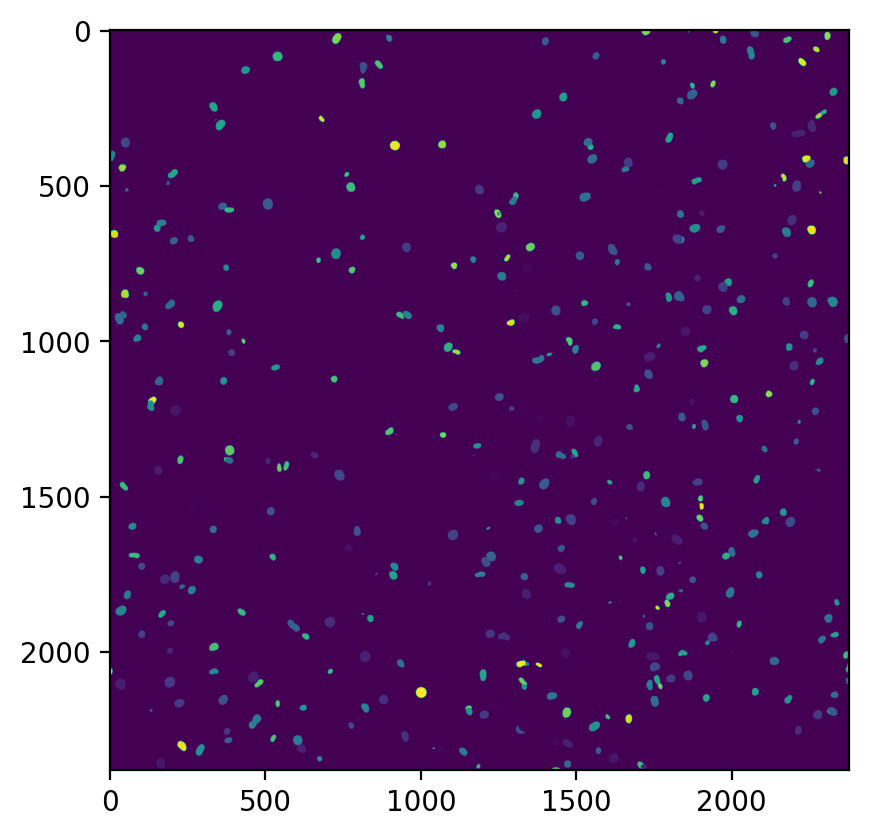

572077944.py (13): <tifffile.imsave> is deprecated. Use tifffile.imwrite


In [8]:
# Save the label stack in the output directory
fnames = [output_image_path+os.path.sep+Path(f).name for f in sorted(glob(dir_raw + file_ext))]

for x,f in zip(X,fnames):
    print('Processing:', f)
    x = normalize(x, 1,99.8, axis=axis_norm)
    labeled_image, description = model.predict_instances(x, n_tiles=model._guess_n_tiles(x), show_tile_progress=True)
    
    # Convert the labeled image from 32 bits to int 16 bits
    labeled_image = np.int16(labeled_image)
    plt.imshow(labeled_image[10])
    plt.show()
    imsave(f,labeled_image)